In [39]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


In [31]:
df = pd.read_excel('./ENB2012_data.xlsx')
df = df.sample(frac=1).reset_index(drop=True)
df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.69,735.0,294.0,220.5,3.5,3,0.40,3,14.56,15.84
1,0.62,808.5,367.5,220.5,3.5,3,0.10,5,12.74,13.97
2,0.76,661.5,416.5,122.5,7.0,3,0.40,2,40.15,40.40
3,0.90,563.5,318.5,122.5,7.0,4,0.25,1,32.84,32.71
4,0.74,686.0,245.0,220.5,3.5,3,0.10,3,10.34,13.36


In [45]:
def format_output(data):
  y1 = data.pop('Y1')
  y1 = np.array(y1)
  y2= data.pop('Y2')
  y2 = np.array(y2)
  return y1, y2

def norm(x):
  return (x-train_stats['mean']) / train_stats['std']

def plot_diff(y_true, y_pred, title=''):
  plt.scatter(y_true, y_pred, color='r')
  plt.title(title)
  plt.xlabel('True values')
  plt.ylabel('Predictions')
  plt.axis('equal')
  plt.axis('square')
  plt.xlim(plt.xlim())
  plt.ylim(plt.ylim())
  plt.plot([-100, 100], (-100, 100))
  plt.show()


def plot_metrics(metric_name, title, ylim=5):
    plt.title(title)
    plt.ylim(0, ylim)
    plt.plot(history.history[metric_name], color='blue', label=metric_name)
    plt.plot(history.history['val_' + metric_name], color='green', label='val_' + metric_name)
    plt.show()

In [33]:
train, test = train_test_split(df, test_size=0.2)

train_stats = train.describe()
train_stats.pop('Y1')
train_stats.pop('Y2')
train_stats = train_stats.transpose()

train_y = format_output(train)
test_y = format_output(test)

norm_train_x = norm(train)
norm_test_x = norm(test)

In [17]:
print(len(norm_train_x))

614


In [34]:
#Build the model
input_layer = tf.keras.layers.Input(shape=(len(train.columns)))
first_dense = tf.keras.layers.Dense(units= 128, activation='relu')(input_layer)
second_dense = tf.keras.layers.Dense(units= 128, activation='relu')(first_dense)
y1_output = tf.keras.layers.Dense(units=1, name='y1_output')(second_dense)
third_dense = tf.keras.layers.Dense(units=64, activation='relu')(second_dense)
y2_output = tf.keras.layers.Dense(units=1, name='y2_output')(third_dense)
model = tf.keras.Model(inputs = input_layer, outputs=[y1_output, y2_output])
print(model.summary())

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_3 (InputLayer)        [(None, 8)]                  0         []                            
                                                                                                  
 dense_6 (Dense)             (None, 128)                  1152      ['input_3[0][0]']             
                                                                                                  
 dense_7 (Dense)             (None, 128)                  16512     ['dense_6[0][0]']             
                                                                                                  
 dense_8 (Dense)             (None, 64)                   8256      ['dense_7[0][0]']             
                                                                                            

In [35]:
optimizer = tf.keras.optimizers.SGD(learning_rate=0.001)
model.compile(optimizer=optimizer,
              loss= {'y1_output':'mse', 'y2_output':'mse'},
              metrics = {'y1_output': tf.keras.metrics.RootMeanSquaredError(),
                         'y2_output': tf.keras.metrics.RootMeanSquaredError()})

In [20]:
len(test_y)

2

In [ ]:
history = model.fit(norm_train_X, train_Y,
                    epochs=500, batch_size=10, validation_data=(norm_test_X, test_Y))

In [37]:
loss, y1_loss, y2_loss, y1_rmse, y2_rmse = model.evaluate(x=norm_test_x, y=test_y)

5/5 [==============================] - 0s 3ms/step - loss: 0.6122 - y1_output_loss: 0.1601 - y2_output_loss: 0.4520 - y1_output_root_mean_squared_error: 0.4001 - y2_output_root_mean_squared_error: 0.6723


In [38]:
Y_pred = model.predict(norm_test_x)

5/5 [==============================] - 0s 3ms/step


5/5 [==============================] - 0s 2ms/step


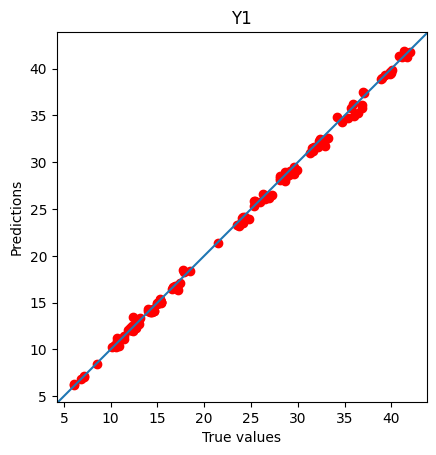

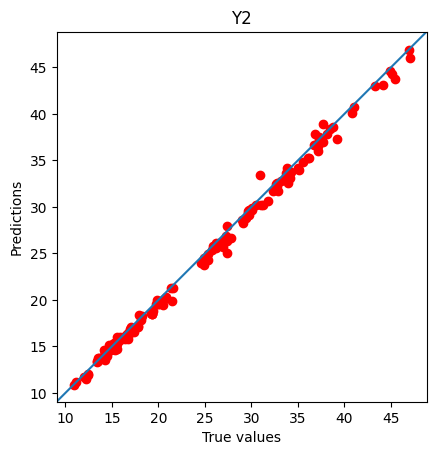

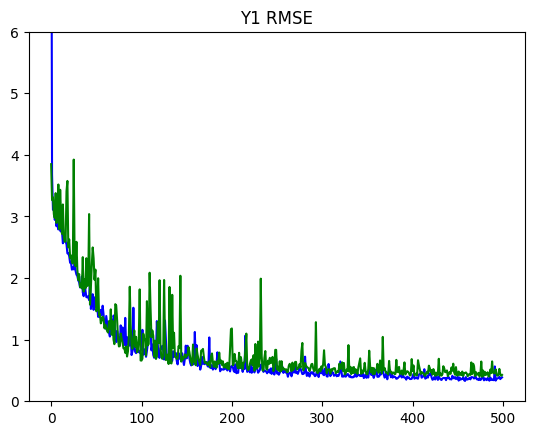

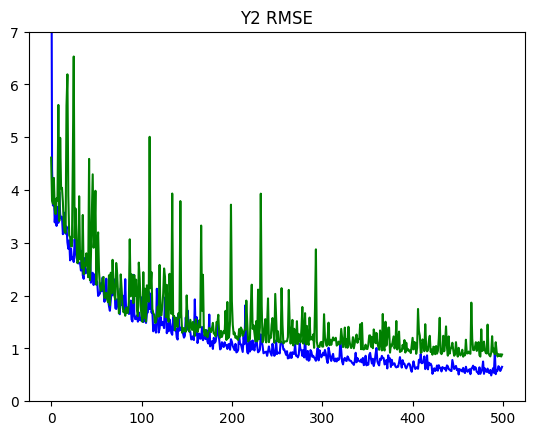

In [46]:
# Plot the loss and mse
Y_pred = model.predict(norm_test_x)
plot_diff(test_y[0], Y_pred[0], title='Y1')
plot_diff(test_y[1], Y_pred[1], title='Y2')
plot_metrics(metric_name='y1_output_root_mean_squared_error', title='Y1 RMSE', ylim=6)
plot_metrics(metric_name='y2_output_root_mean_squared_error', title='Y2 RMSE', ylim=7)